In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
dataset_train=pd.read_csv('file:///Users/mac/Downloads/Train.csv')
dataset_test=pd.read_csv('file:///Users/mac/Downloads/Test.csv') 

In [3]:
dataset_test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [4]:
dataset_train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [6]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applicant_ID  24000 non-null  object 
 1   form_field1   22890 non-null  float64
 2   form_field2   22291 non-null  float64
 3   form_field3   23854 non-null  float64
 4   form_field4   23854 non-null  float64
 5   form_field5   23854 non-null  float64
 6   form_field6   18396 non-null  float64
 7   form_field7   21769 non-null  float64
 8   form_field8   18396 non-null  float64
 9   form_field9   20600 non-null  float64
 10  form_field10  23853 non-null  float64
 11  form_field11  10602 non-null  float64
 12  form_field12  19817 non-null  float64
 13  form_field13  21537 non-null  float64
 14  form_field14  24000 non-null  int64  
 15  form_field15  14408 non-null  float64
 16  form_field16  18526 non-null  float64
 17  form_field17  19305 non-null  float64
 18  form_field18  19631 non-nu

In [7]:
print("dataset_train shape: ",dataset_train.shape)
print("dataset_test shape: ",dataset_test.shape)

dataset_train shape:  (56000, 52)
dataset_test shape:  (24000, 51)


In [8]:
dataset_train.nunique()

Applicant_ID      56000
form_field1         449
form_field2       20015
form_field3       14617
form_field4        2927
form_field5        2991
form_field6        5846
form_field7       23199
form_field8       12820
form_field9       22650
form_field10      30942
form_field11       9508
form_field12      16778
form_field13      21960
form_field14       1237
form_field15      23783
form_field16         11
form_field17         15
form_field18         16
form_field19         26
form_field20         27
form_field21      11101
form_field22      23583
form_field23      16619
form_field24      12571
form_field25       5014
form_field26        594
form_field27        558
form_field28         95
form_field29        654
form_field30        274
form_field31        394
form_field32       2620
form_field33        554
form_field34         18
form_field35         11
form_field36         66
form_field37         52
form_field38         58
form_field39         15
form_field40       9848
form_field41    

In [9]:
dataset_test.nunique()

Applicant_ID    24000
form_field1       440
form_field2     11473
form_field3      7847
form_field4      1578
form_field5      1560
form_field6      3567
form_field7     12967
form_field8      7360
form_field9     11706
form_field10    15939
form_field11     5791
form_field12    10340
form_field13    12295
form_field14      739
form_field15    10987
form_field16        9
form_field17       11
form_field18       11
form_field19       22
form_field20       22
form_field21     8610
form_field22    11070
form_field23     7966
form_field24     8902
form_field25     4035
form_field26      543
form_field27      506
form_field28       89
form_field29      620
form_field30      250
form_field31      373
form_field32     2219
form_field33      502
form_field34       14
form_field35        9
form_field36       54
form_field37       47
form_field38       44
form_field39       11
form_field40     4356
form_field41     6767
form_field42      778
form_field43       52
form_field44    16542
form_field

In [10]:
#Data processing
dataset_train.isnull().sum()
#Dealing with missing values

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [11]:
#Data processing
dataset_test.isnull().sum()
#Dealing with missing values

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

In [12]:
## OUT OF THE 2 CATEGORICAL COLUMNS "NONE" has missing values
## i filled the missing values with a new categorical value "None"

In [13]:
## ALMOST ALL THE NUMERICAL COLUMNS HAVE MISSING VALUES except form_field14&19
## I FILL THE MISSING VALUES WITH A VALUE OF "0.0", you can use mean, median, mode values for this also (whichever works best)
for i in ['form_field1', 'form_field2', 'form_field3', 'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11', 'form_field12', 'form_field13', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19', 'form_field20', 'form_field21', 'form_field22', 
       'form_field23', 'form_field24', 'form_field25', 'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44','form_field45','form_field46','form_field48', 'form_field49', 'form_field50']:
    dataset_train[i] = dataset_train[i].fillna(value = 0.0)

In [14]:
dataset_train.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [15]:
## OUT OF THE 2 CATEGORICAL COLUMNS "NONE" has missing values
## i filled the missing values with a new categorical value "None"
## ALMOST ALL THE NUMERICAL COLUMNS HAVE MISSING VALUES
## I FILL THE MISSING VALUES WITH A VALUE OF "0.0", you can use mean, median, mode values for this also (whichever works best)
for i in ['form_field1', 'form_field2', 'form_field3', 'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11', 'form_field12', 'form_field13', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field20', 'form_field21', 'form_field22', 
       'form_field23', 'form_field24', 'form_field25', 'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44','form_field45','form_field46','form_field48', 'form_field49', 'form_field50']:
    dataset_test[i] = dataset_test[i].fillna(value = 0.0)

In [16]:
dataset_test.isnull().sum()

Applicant_ID    0
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

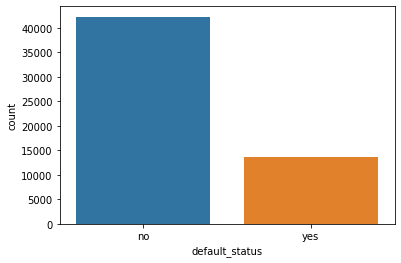

In [17]:
sns.countplot(x= "default_status", data= dataset_train)
plt.show()
#few numbers of people default

In [18]:
#feature engineering
#for converting the categorical variables to numerical variables
Col= ("Applicant_ID", "form_field47","default_status")
for x in Col:
    le= LabelEncoder()
    dataset_train[x]= le.fit_transform(dataset_train[x].values)
dataset_train.dtypes

Applicant_ID        int64
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [19]:
#feature engineering
#for converting the categorical variables to numerical variables
Cols = ("Applicant_ID", "form_field47")
for x in Cols:
    le= LabelEncoder()
    dataset_test[x]= le.fit_transform(dataset_test[x].values)
dataset_test.dtypes

Applicant_ID      int64
form_field1     float64
form_field2     float64
form_field3     float64
form_field4     float64
form_field5     float64
form_field6     float64
form_field7     float64
form_field8     float64
form_field9     float64
form_field10    float64
form_field11    float64
form_field12    float64
form_field13    float64
form_field14      int64
form_field15    float64
form_field16    float64
form_field17    float64
form_field18    float64
form_field19    float64
form_field20    float64
form_field21    float64
form_field22    float64
form_field23    float64
form_field24    float64
form_field25    float64
form_field26    float64
form_field27    float64
form_field28    float64
form_field29    float64
form_field30    float64
form_field31    float64
form_field32    float64
form_field33    float64
form_field34    float64
form_field35    float64
form_field36    float64
form_field37    float64
form_field38    float64
form_field39    float64
form_field40    float64
form_field41    

In [20]:
dataset_train= dataset_train.groupby(["Applicant_ID"]).mean().reset_index()
dataset_test= dataset_test.groupby(["Applicant_ID"]).mean().reset_index()
dataset_train
#groupby on the customer id column and then resetting it as the index column

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,0,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,0,0.000000,1.129518,0.044335,0
1,1,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,0.0,0.0,0,349.805730,1.620483,0.322436,0
2,2,3276.0,0.53845,3.1510,0.0000,6.282,0.0,956940.0,0.0,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,0,0.000000,1.513370,0.011640,1
3,3,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,0.0,0.0,0,89.940100,0.664452,0.082729,0
4,4,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,55995,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,...,0.000000,9.09,0.730040,0.0,0.0,1,591.048913,0.000000,0.241598,0
55996,55996,3360.0,2.01145,0.6252,0.0000,0.000,0.0,927765.0,0.0,0.0,...,0.297913,30.30,0.498208,0.0,0.0,1,0.000000,0.000000,0.000000,1
55997,55997,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,...,0.550000,3.03,0.450512,0.0,0.0,1,1252.474467,2.000000,0.163153,0
55998,55998,3280.0,0.05235,2.0916,2.2212,0.000,0.0,3458599.0,0.0,115533.0,...,0.942854,0.00,0.705048,1.0,0.0,0,0.000000,0.000000,0.002997,0


In [21]:
## We drop some columns: 
## 1) "Applicant_ID": because each of values is unique, so its redundant to the model (i think *smiles*)
## 2) "form_field47": because it possesses only one value for all the entries, so its redundant (you can attempt to include it and comapre results)
## 3) "default_status": it is the target columns it will be assigned to "y"
#X = dataset_train.drop(["Applicant_ID", "form_field47", "default_status"], axis =1)
#y = dataset_train["default_status"]

#X_test = dataset_test.drop(["Applicant_ID", "form_field47"], axis = 1)

In [22]:
train_new= dataset_train.drop("Applicant_ID",axis= 1)

X= train_new.drop("default_status", axis= 1)
y= train_new.default_status

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

In [23]:
Rf= RandomForestClassifier(n_estimators= 300, random_state= 0)
Ab= AdaBoostClassifier(n_estimators= 100, learning_rate= 0.1)
Rf.fit(X_train,y_train)
pred= Rf.predict(X_val)
Ab.fit(X_train,y_train)
preds= Ab.predict(X_val)
print("RF's accuracy score:",accuracy_score(pred,y_val))
print("Ab's accuracy score:", accuracy_score(preds, y_val))

RF's accuracy score: 0.8032142857142858
Ab's accuracy score: 0.7896428571428571


In [24]:
gbr= GradientBoostingClassifier(learning_rate= 0.1, random_state= 0, n_estimators= 50)
gbr.fit(X_train,y_train)
prd= gbr.predict(X_val)

print("GBR's accuracy score:",accuracy_score(y_val, prd))

GBR's accuracy score: 0.7954464285714286


In [25]:
score= cross_val_score(Ab, X,y, cv= 5)
score

array([0.79723214, 0.79946429, 0.80160714, 0.79339286, 0.79741071])

<AxesSubplot:>

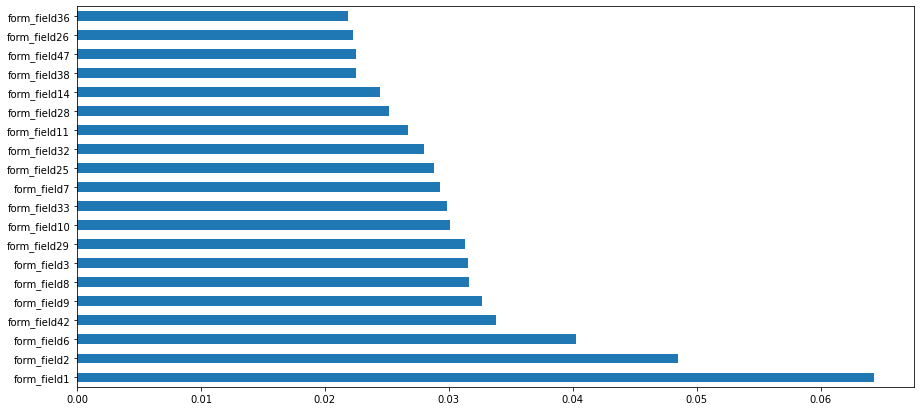

In [26]:
#feature importance for Random ForestClassifier

%matplotlib inline 
plt.figure(figsize=(15,7))
feat_importances = pd.Series(Rf.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [27]:
gbr.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[[7859  551]
 [1653 1137]]


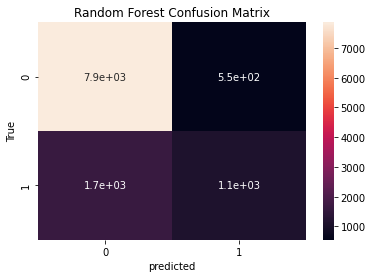

<Figure size 720x432 with 0 Axes>

In [28]:
ax= plt.subplot()
cm= confusion_matrix(y_val, pred)
print(cm)
sns.heatmap(cm, annot= True, ax= ax);

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True");
ax.set_title("Random Forest Confusion Matrix");

[[7896  514]
 [1842  948]]


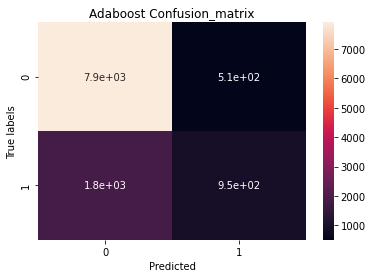

<Figure size 720x432 with 0 Axes>

In [29]:
ax= plt.subplot()
dm= confusion_matrix(y_val,preds)
print(dm)
sns.heatmap(dm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
plt.figure(figsize=(10,6))
ax.set_xlabel('Predicted');ax.set_ylabel('True labels'); 
ax.set_title('Adaboost Confusion_matrix');

[[7797  613]
 [1678 1112]]


Text(0.5, 1.0, 'Gradient Confusion mattix')

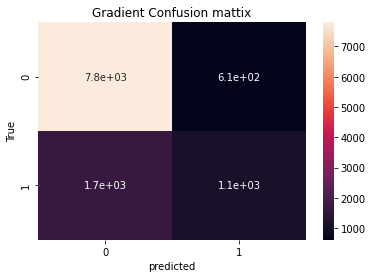

<Figure size 720x432 with 0 Axes>

In [30]:
ax= plt.subplot()
pm= confusion_matrix(y_val, prd)
print(pm)
sns.heatmap(pm, annot= True, ax= ax)

plt.figure(figsize=(10,6))
ax.set_xlabel("predicted"); ax.set_ylabel("True")
ax.set_title("Gradient Confusion mattix")

In [31]:
index = dataset_test.pop('Applicant_ID')

In [32]:
dataset_test_yhat= Ab.predict(dataset_test)

In [33]:
submission = pd.read_csv("file:///Users/mac/Downloads/SampleSubmission_2.csv")
submission

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1
...,...,...
23995,Apcnt_999940,1
23996,Apcnt_999956,1
23997,Apcnt_999976,1
23998,Apcnt_999984,1


In [34]:
submission.default_status = dataset_test_yhat
submission

,Applicant_ID,default_status
0,Apcnt_1000032,0
1,Apcnt_1000048,0
2,Apcnt_1000052,0
3,Apcnt_1000076,1
4,Apcnt_1000080,0
...,...,...
23995,Apcnt_999940,0
23996,Apcnt_999956,0
23997,Apcnt_999976,0
23998,Apcnt_999984,1


In [35]:
submission.to_csv("Loan_Default.csv",index= False)

In [37]:
dataset_test_yhat = gbr.predict(dataset_test)

In [38]:
submission.default_status = dataset_test_yhat
submission

,Applicant_ID,default_status
0,Apcnt_1000032,0
1,Apcnt_1000048,0
2,Apcnt_1000052,0
3,Apcnt_1000076,1
4,Apcnt_1000080,0
...,...,...
23995,Apcnt_999940,1
23996,Apcnt_999956,0
23997,Apcnt_999976,0
23998,Apcnt_999984,0


In [39]:
submission.to_csv("Default_status.csv",index= False)